Add the required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

Read input data

In [2]:
df = pd.read_csv("/content/Breast_Cancer.csv")
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


Check Data

In [3]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [4]:
check(df)

,column,dtypes,nunique,sum_null
0,Age,int64,40,0
1,Race,object,3,0
2,Marital Status,object,5,0
3,T Stage,object,4,0
4,N Stage,object,3,0
5,6th Stage,object,5,0
6,differentiate,object,4,0
7,Grade,object,4,0
8,A Stage,object,2,0
9,Tumor Size,int64,110,0


Remove unwanted characters (defaults to spaces) at the beginning and end of the string.

In [5]:
df.columns = df.columns.str.strip()

Check the number of NaN values ​​in the Status column

In [6]:
print("The number of NaN values ​​in the Status column:", df['Status'].isna().sum())

The number of NaN values ​​in the Status column: 0


Convert values ​​in DataFrame to numbers

In [7]:
df1=df.copy()
le=LabelEncoder()
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
df1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


Summary of data statistics

In [8]:
temp = df1.describe()
temp.style.background_gradient(cmap='Oranges')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,23.972167,1.775845,1.371272,0.784791,0.438370,1.321819,0.690358,2.131710,0.977137,29.226392,0.933151,0.826541,13.349155,3.154573,70.297962,0.153082
std,8.963134,0.564465,1.063637,0.765531,0.693479,1.266624,1.016418,0.642398,0.149485,20.207811,0.249791,0.378691,8.060677,5.084615,22.921430,0.360111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,15.000000,1.000000,1.000000,8.000000,0.000000,55.000000,0.000000
50%,24.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,24.000000,1.000000,1.000000,13.000000,1.000000,72.000000,0.000000
75%,31.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,37.000000,1.000000,1.000000,18.000000,4.000000,89.000000,0.000000
max,39.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,109.000000,1.000000,1.000000,53.000000,37.000000,106.000000,1.000000


Calculate correlation matrix and draw heatmap

<Axes: >

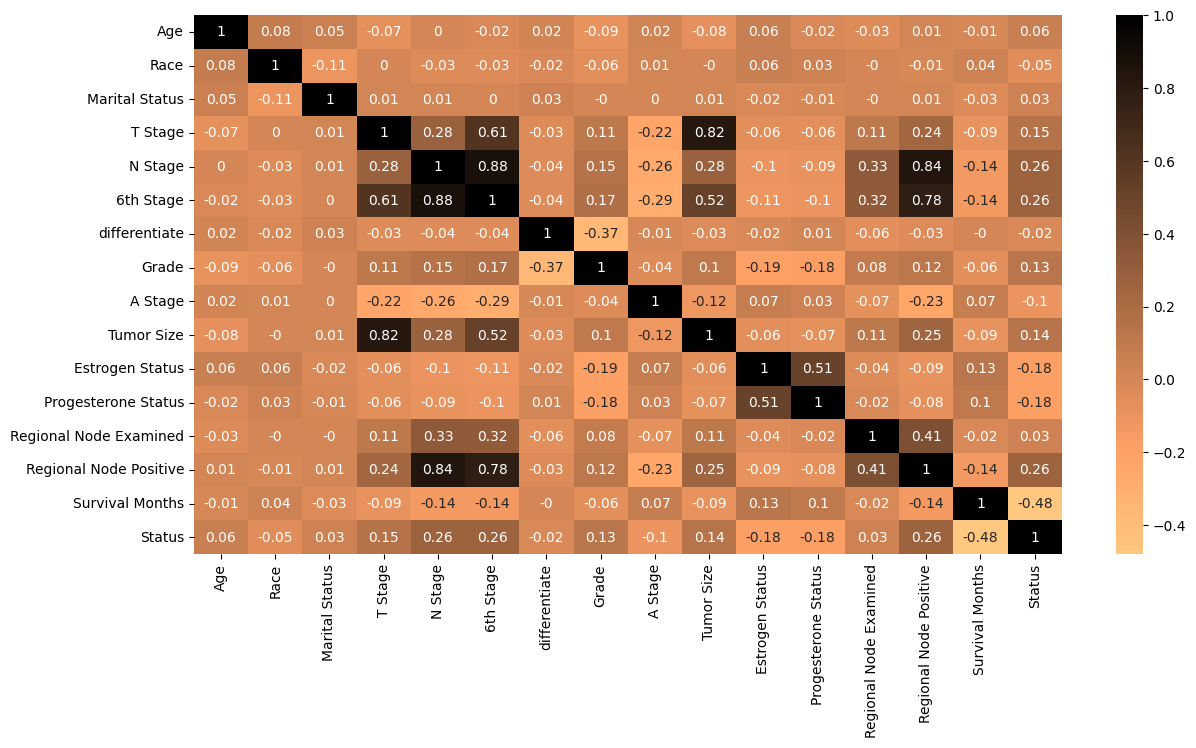

In [10]:
correlation = df1.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'copper_r')

This row splits the data into features (X) and labels (y). X contains all columns except the Status column, while y contains only the Status column.

In [11]:
df2=df1.copy()
X = df2.drop(columns=['Status'])
y = df2['Status']

Split the data into two parts: training set (X_train, y_train) and test set (X_test, y_test). 80% of the data is used for training and the remaining 20% ​​is used for testing the model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Building the AdaBoost model**

In [15]:
model = AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME')
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42)

**Predict and Evaluate the Model**

Use the trained model to make predictions (y_pred) on the test set (X_test). You can then use evaluation metrics such as accuracy, classification report, and confusion matrix to evaluate the performance of the model.

In [16]:
y_pred = model.predict(X_test)

Model Evaluation

In [17]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy : 0.9142857142857143

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.82      0.54      0.65       120

    accuracy                           0.91       805
   macro avg       0.87      0.76      0.80       805
weighted avg       0.91      0.91      0.91       805



Plot a heatmap to visualize the performance of your classification model, allowing you to easily see the number of correct predictions (diagonal elements) and model errors (off-diagonal elements).

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

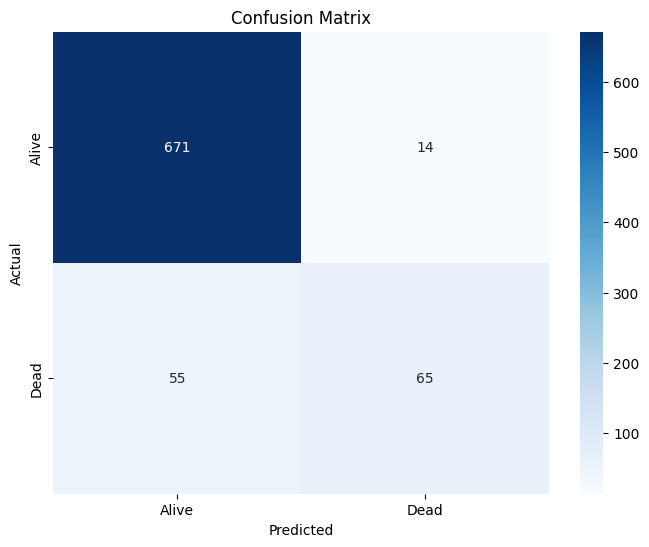

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plot a scatter plot between the actual value (y_test) and the predicted value (y_pred). The red diagonal line represents the correct predictions. Points above this line are correct predictions, and points away from this line are incorrect predictions.

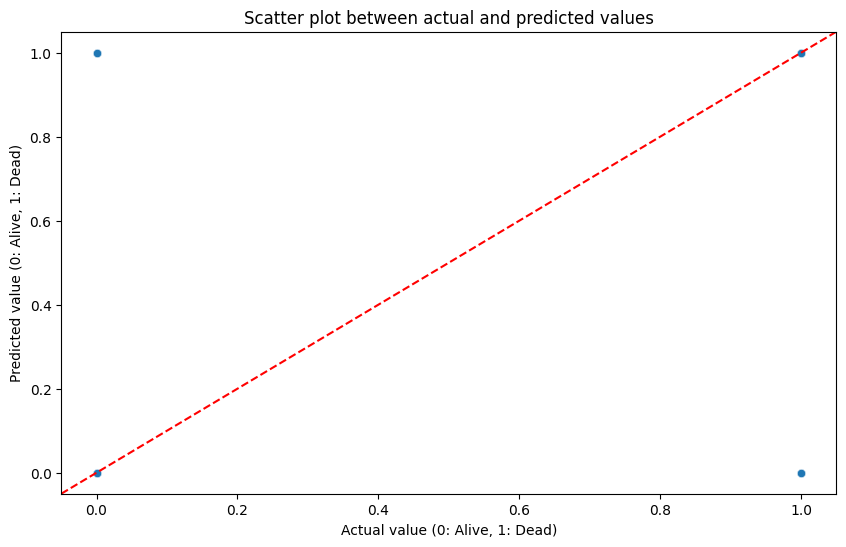

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.title("Scatter plot between actual and predicted values")
plt.xlabel("Actual value (0: Alive, 1: Dead)")
plt.ylabel("Predicted value (0: Alive, 1: Dead)")
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.show()

**Significance of Results for the Research Problem**

The model's results help assess the ability to predict the survival status (Alive/Dead) of patients in the cancer dataset. If the model achieves high accuracy, it can be used to make predictions and assist doctors in diagnosing patients. Scatter plots and confusion matrices provide a visual representation of the model's performance. Identifying points that do not lie on the diagonal of the scatter plot can help pinpoint errors and areas for model improvement.

**Impact of Data Preprocessing**

Data preprocessing, such as encoding categorical columns and handling missing values (NaN), is crucial because machine learning models cannot operate on missing or invalid data. Poor handling of this step can result in inaccurate predictions or prevent the model from being trained effectively.

**Limitations of the Study**
* Low Accuracy: The model may not achieve high accuracy if the features are not strong enough or the model is not optimized. Testing other algorithms or refining the model may help improve performance.
* Imbalanced Data: If the class distribution (Alive/Dead) is imbalanced, the model may be biased toward the dominant class. Techniques like class_weight can be employed to address this issue.

**Scalability and Improvements**
* Scalability: The model can be scaled to predict larger datasets or integrated with other methods, such as deep learning, to enhance performance.
* Improvements: The model can be improved by experimenting with other algorithms like Random Forest, XGBoost, or deep learning models to compare and identify the best-performing approach.

**Comparison with Other Studies**

Other studies may use more robust models, such as deep neural networks or XGBoost, to achieve better results. However, AdaBoost remains an effective choice for basic classification tasks.